# Loading the Dataset

In [4]:

import pandas as pd

header = pd.read_csv('./har/UCI HAR Dataset/features.txt', sep=' ', index_col=0, names=['feature'])
header

,feature
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y
...,...
557,"angle(tBodyGyroMean,gravityMean)"
558,"angle(tBodyGyroJerkMean,gravityMean)"
559,"angle(X,gravityMean)"
560,"angle(Y,gravityMean)"


In [5]:
header[header.duplicated(subset=['feature'])]

,feature
317,"fBodyAcc-bandsEnergy()-1,8"
318,"fBodyAcc-bandsEnergy()-9,16"
319,"fBodyAcc-bandsEnergy()-17,24"
320,"fBodyAcc-bandsEnergy()-25,32"
321,"fBodyAcc-bandsEnergy()-33,40"
...,...
498,"fBodyGyro-bandsEnergy()-17,32"
499,"fBodyGyro-bandsEnergy()-33,48"
500,"fBodyGyro-bandsEnergy()-49,64"
501,"fBodyGyro-bandsEnergy()-1,24"


In [6]:
X = pd.read_csv('./har/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [7]:
from keras.src.utils import np_utils

y = pd.read_csv('./har/UCI HAR Dataset/train/y_train.txt', header=None, names=['label']).apply(lambda x: x - 1)
y = np_utils.to_categorical(y, num_classes=6)
y

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

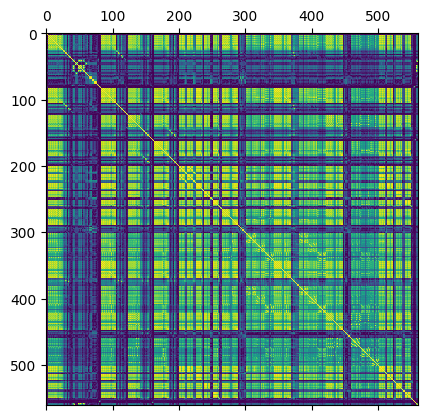

In [8]:
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = X.corr().abs()

plt.matshow(correlation_matrix)
plt.show()

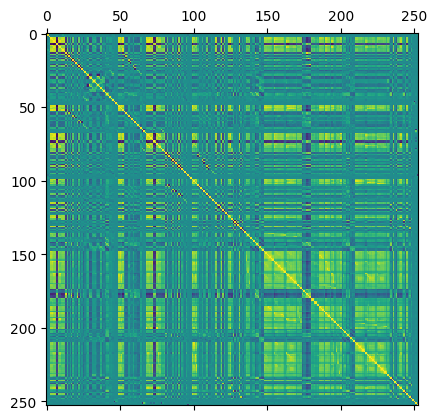

In [9]:
upper_correlation_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_correlation_matrix.columns if any(upper_correlation_matrix[column] > 0.95)]
X.drop(to_drop, axis=1, inplace=True)

plt.matshow(X.corr())
plt.show()

In [10]:
X

,0,1,2,3,4,5,11,14,17,18,...,538,539,545,550,551,552,554,555,556,557
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.744413,0.814263,-0.999863,-0.994612,...,-0.128989,0.586156,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.818409,0.822637,-0.999788,-0.998405,...,-0.271958,-0.336310,-0.994440,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.818409,0.839344,-0.999660,-0.999470,...,-0.212728,-0.535352,-0.995866,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.829711,0.837869,-0.999736,-0.999504,...,-0.035684,-0.230091,-0.995732,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.824705,0.837869,-0.999856,-0.999757,...,-0.273582,-0.510282,-0.997418,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.076700,0.266917,-0.788077,-0.473463,...,-0.376234,-0.170845,-0.925241,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.031966,0.266917,-0.804546,-0.495789,...,-0.296176,0.019626,-0.761880,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,0.055411,0.264670,-0.844279,-0.271194,...,-0.320249,0.490169,-0.692582,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,0.055411,0.264670,-0.846871,-0.279718,...,-0.412332,0.308105,-0.886154,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479


In [11]:
from sklearn.model_selection import train_test_split

n = 0.3
random_seed = 42
np.random.seed(random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, random_state=random_seed)
X_train

,0,1,2,3,4,5,11,14,17,18,...,538,539,545,550,551,552,554,555,556,557
4578,0.284320,-0.019893,-0.118184,-0.990051,-0.983800,-0.970274,-0.810197,0.833859,-0.999874,-0.999047,...,-0.057645,-0.309221,-0.994614,-0.936508,0.240570,-0.333416,0.067654,0.055710,0.332906,0.563997
3027,0.267326,-0.024155,-0.078986,-0.393155,-0.152924,-0.199935,-0.428731,0.256988,-0.860608,-0.709534,...,-0.317248,-0.401919,-0.840643,-0.904762,0.124565,-0.172346,0.306129,-0.594474,0.828610,0.846243
3407,0.327495,-0.057756,-0.178172,0.071035,0.013070,-0.061259,-0.314871,0.349485,-0.798543,-0.597033,...,-0.034555,-0.186315,-0.751486,-0.904762,0.065099,-0.727589,-0.453172,0.807221,-0.951796,0.603144
613,0.203195,-0.038447,-0.138711,-0.309882,-0.022839,-0.379230,-0.413209,0.298094,-0.814386,-0.822508,...,0.238002,-0.400589,-0.804827,-0.873016,-0.120821,-0.185789,0.339867,0.399665,0.022148,0.073721
3208,0.396326,-0.027872,-0.148761,0.368238,0.009455,0.203998,-0.420172,-0.188743,-0.802708,-0.351513,...,0.109874,-0.448950,-0.467036,-0.873016,0.296752,-0.278142,-0.726925,-0.307535,0.818037,-0.701293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.373579,0.475699,-0.844046,-0.854676,...,-0.265724,-0.490616,-0.979544,-0.904762,0.022624,0.417731,-0.155279,-0.137981,0.929236,-0.583898
5226,0.289183,-0.049248,-0.125083,-0.290043,-0.212102,-0.469731,-0.123285,0.577615,-0.877411,-0.869941,...,0.041601,-0.846175,-0.945451,-0.904762,-0.039773,-0.021970,-0.019533,-0.896005,-0.039591,0.494178
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.441355,0.469639,-0.880613,-0.847948,...,-0.185158,-0.609038,-0.957445,-0.904762,0.094031,0.527152,-0.414621,-0.488542,0.095895,-0.297162
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.805684,0.828575,-0.999897,-0.998961,...,0.099050,-0.327943,-0.994633,-0.682540,0.539885,-0.889671,-0.079515,0.014291,-0.290347,0.602344


In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(units=512, input_shape=(253,)),
    Dense(128, activation='relu'),
    Dense(6)
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train.values, y_train, epochs=50, batch_size=32)

Epoch 1/50
161/161 [==============================] - 1s 3ms/step - loss: 8.3741 - accuracy: 0.1716
Epoch 2/50
161/161 [==============================] - 0s 3ms/step - loss: 8.9016 - accuracy: 0.1708
Epoch 3/50
161/161 [==============================] - 0s 3ms/step - loss: 8.9016 - accuracy: 0.1708
Epoch 4/50
161/161 [==============================] - 0s 3ms/step - loss: 8.9016 - accuracy: 0.1708
Epoch 5/50
161/161 [==============================] - 0s 3ms/step - loss: 8.9016 - accuracy: 0.1708
Epoch 6/50
161/161 [==============================] - 0s 3ms/step - loss: 8.9016 - accuracy: 0.1708
Epoch 7/50
161/161 [==============================] - 0s 3ms/step - loss: 8.9016 - accuracy: 0.1708
Epoch 8/50
161/161 [==============================] - 0s 3ms/step - loss: 8.9016 - accuracy: 0.1708
Epoch 9/50
161/161 [==============================] - 0s 3ms/step - loss: 8.9016 - accuracy: 0.1708
Epoch 10/50
161/161 [==============================] - 0s 2ms/step - loss: 8.9016 - accuracy: 0.1708

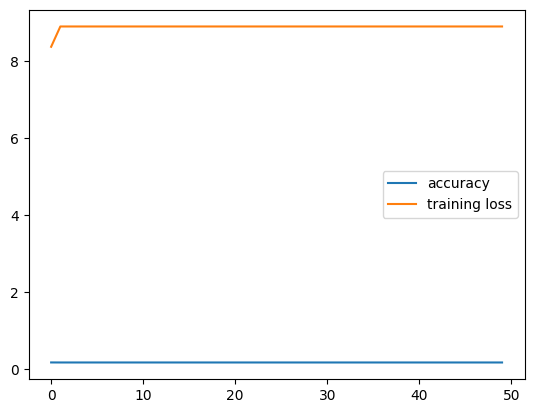

69/69 [==============================] - 0s 1ms/step - loss: 8.9577 - accuracy: 0.1877
Accuracy on testing data: 18.77


In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.legend()
plt.gray()
plt.show()

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy on testing data: %.2f' % (accuracy * 100))

In [14]:

from keras import metrics
import keras
from keras_tuner import HyperParameters


def build_model(hp: HyperParameters):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_0',
                                 min_value=32,
                                 max_value=512,
                                 step=32),
                    activation='relu',
                    input_dim=253))
    for i in range(hp.Int('num_layers', 1, 7)):
        model.add(Dense(units=hp.Int('units_' + str(i + 1),
                                     min_value=32,
                                     max_value=1024,
                                     step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float('dropout_' + str(i + 1),
                                   min_value=0.0,
                                   max_value=0.5,
                                   step=0.1)))
    model.add(Dense(6, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

Using TensorFlow backend


In [15]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='.model_cache',
    project_name='Project Human Activities'
)

tuner.search(X_train, y_train,
             epochs=50,
             batch_size=10,
             validation_data=(X_test, y_test))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
224               |224               |units_0
4                 |4                 |num_layers
608               |608               |units_1
0.2               |0.2               |dropout_1
0.0001            |0.0001            |learning_rate
Epoch 1/50
515/515 [==============================] - 3s 4ms/step - loss: 0.3250 - accuracy: 0.5878 - precision: 0.7083 - recall: 0.2666 - val_loss: 0.1658 - val_accuracy: 0.8540 - val_precision: 0.8509 - val_recall: 0.7656
Epoch 2/50
515/515 [==============================] - 2s 3ms/step - loss: 0.1326 - accuracy: 0.8614 - precision: 0.8611 - recall: 0.8094 - val_loss: 0.0882 - val_accuracy: 0.9216 - val_precision: 0.9263 - val_recall: 0.8885
Epoch 3/50
515/515 [==============================] - 2s 4ms/step - loss: 0.0825 - accuracy: 0.9135 - precision: 0.9141 - recall: 0.8993 - val_loss: 0.0610 - val_accuracy: 0.9411 - val_precision: 0.9497 - val_recall: 0.9166
Epoch 4

KeyboardInterrupt: 

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [22]:
best_hyperparameters.__dict__

NameError: name 'best_hyperparameters' is not defined

In [48]:
X_heldback = pd.read_csv('./har/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)[X.columns]
y_heldback = pd.read_csv('./har/UCI HAR Dataset/test/y_test.txt', header=None, names=['label']).apply(lambda x: x - 1)
y_heldback = np_utils.to_categorical(y_heldback, num_classes=6)
X_heldback

,0,1,2,3,4,5,11,14,17,18,...,538,539,545,550,551,552,554,555,556,557
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.466223,0.789497,-0.998414,-0.934345,...,-0.047391,-0.467849,-0.909829,-1.000000,0.071645,-0.330370,0.006462,0.162920,-0.825886,0.271151
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.806013,0.796706,-0.999646,-0.997720,...,-0.031474,-0.090655,-0.986902,-1.000000,-0.401189,-0.121845,-0.083495,0.017500,-0.434375,0.920593
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.799116,0.822442,-0.999570,-0.998720,...,-0.168805,-0.662317,-0.989609,-0.936508,0.062891,-0.190422,-0.034956,0.202302,0.064103,0.145068
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.799116,0.822442,-0.999330,-0.998933,...,-0.285636,-0.446478,-0.992021,-0.936508,0.116695,-0.344418,-0.017067,0.154438,0.340134,0.296407
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.825894,0.829897,-0.999467,-0.998823,...,-0.349061,-0.319763,-0.992505,-0.936508,-0.121711,-0.534685,-0.002223,-0.040046,0.736715,-0.118545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.131106,0.362922,-0.854291,-0.721311,...,0.093839,-0.410787,-0.770173,-0.904762,0.074472,-0.376278,-0.337422,0.346295,0.884904,-0.698885
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.131106,0.218490,-0.794744,-0.708265,...,0.092162,-0.449349,-0.947627,-0.904762,0.101859,-0.320418,-0.736701,-0.372889,-0.657421,0.322549
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.172677,0.218490,-0.818344,-0.745217,...,-0.122065,-0.283911,-0.930426,-0.904762,-0.066249,-0.118854,-0.181560,0.088574,0.696663,0.363139
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.172677,0.246700,-0.882274,-0.715982,...,-0.220897,-0.266982,-0.785712,-0.904762,-0.046467,-0.205445,0.444558,-0.819188,0.929294,-0.008398


In [23]:
best_model = tuner.get_best_models(1)[0]
best_model.evaluate(X_heldback, y_heldback, batch_size=10)

NameError: name 'X_heldback' is not defined

In [ ]:
model.metrics

## CNN

In [51]:
X_train_cnn = X_train.to_numpy().reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.to_numpy().reshape(-1, X_train.shape[1], 1)
X_heldback_cnn = X_heldback.to_numpy().reshape(-1, X_heldback.shape[1], 1)
X_train_cnn

array([[[ 0.28432034],
        [-0.01989251],
        [-0.11818383],
        ...,
        [ 0.05570961],
        [ 0.33290566],
        [ 0.56399713]],

       [[ 0.26732558],
        [-0.02415528],
        [-0.07898562],
        ...,
        [-0.59447358],
        [ 0.82860982],
        [ 0.84624269]],

       [[ 0.32749528],
        [-0.05775618],
        [-0.17817215],
        ...,
        [ 0.80722104],
        [-0.95179633],
        [ 0.60314369]],

       ...,

       [[ 0.29394596],
        [-0.01834118],
        [-0.11991614],
        ...,
        [-0.48854194],
        [ 0.09589477],
        [-0.29716206]],

       [[ 0.28047468],
        [-0.0189761 ],
        [-0.11375647],
        ...,
        [ 0.01429139],
        [-0.29034651],
        [ 0.60234438]],

       [[ 0.26358177],
        [ 0.00692832],
        [-0.09531975],
        ...,
        [-0.70078359],
        [-0.2367568 ],
        [ 0.34408288]]])

In [53]:
from tensorflow import keras
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Dropout
from keras import Model as Model_

class CNN_Model(Model_):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = Conv1D(25, 3, activation='relu')
        self.maxpool = MaxPooling1D()
        self.conv2 = Conv1D(32, 3, activation='relu')
        self.globalmaxpool = GlobalMaxPooling1D()
        self.dropout = Dropout(0.2)
        self.outputLayer = Dense(6, activation='softmax')

    # to use the model 
    def call(self, input_x):
        output = input_x
        output = self.conv1(output)
        output = self.maxpool(output)
        output = self.conv2(output)
        output = self.globalmaxpool(output)
        output = self.dropout(output)
        return self.outputLayer(output)



In [54]:
# initiate a model instance
model = CNN_Model()
# compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.CategoricalAccuracy(name='accuracy')],
)

history = model.fit(
    X_train_cnn,
    y_train,
    batch_size=10,
    epochs=50,
    validation_data=(X_test_cnn, y_test),
)
model.evaluate(X_heldback_cnn, y_heldback, batch_size=10)


Epoch 1/50
515/515 [==============================] - 2s 3ms/step - loss: 1.5147 - accuracy: 0.3852 - val_loss: 1.0863 - val_accuracy: 0.7199
Epoch 2/50
515/515 [==============================] - 1s 3ms/step - loss: 0.8886 - accuracy: 0.6613 - val_loss: 0.6193 - val_accuracy: 0.7752
Epoch 3/50
515/515 [==============================] - 1s 2ms/step - loss: 0.6398 - accuracy: 0.7472 - val_loss: 0.4563 - val_accuracy: 0.8590
Epoch 4/50
515/515 [==============================] - 1s 2ms/step - loss: 0.5221 - accuracy: 0.7927 - val_loss: 0.4041 - val_accuracy: 0.8563
Epoch 5/50
515/515 [==============================] - 1s 2ms/step - loss: 0.4759 - accuracy: 0.8154 - val_loss: 0.3467 - val_accuracy: 0.8781
Epoch 6/50
515/515 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.8387 - val_loss: 0.3005 - val_accuracy: 0.9053
Epoch 7/50
515/515 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8447 - val_loss: 0.2784 - val_accuracy: 0.9116
Epoch 

[0.342725545167923, 0.8639293909072876]

In [35]:
def build_cnn_model(hp):
   model = CNN_Model()

   # Tune the number of filters in the first Conv1D layer
   hp_filters_1 = hp.Int('filters_1', min_value=16, max_value=128, step=16)
   model.conv1 = Conv1D(filters=hp_filters_1, kernel_size=3, activation='relu')

   # Tune the number of filters in the second Conv1D layer
   hp_filters_2 = hp.Int('filters_2', min_value=16, max_value=128, step=16)
   model.conv2 = Conv1D(filters=hp_filters_2, kernel_size=3, activation='relu')

   # Tune the dropout rate
   hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
   model.dropout = Dropout(hp_dropout)

   # Compile the model
   model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

   return model

In [43]:
tuner = RandomSearch(
   build_model,
   objective='val_accuracy',
   max_trials=5,
   executions_per_trial=3,
   directory='.model_cache',
   project_name='Project Human Activites CNN'
)

history = tuner.search(X_train, y_train, epochs=50, validation_data=(X_test_cnn, y_test))
history

Trial 5 Complete [00h 02m 23s]
val_accuracy: 0.9842852751413981

Best val_accuracy So Far: 0.9842852751413981
Total elapsed time: 00h 14m 19s


In [45]:
best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
best_hyperparameters.__dict__

{'_name_scopes': [],
 '_conditions': [],
 '_hps': defaultdict(list,
             {'units_0': [Int(name: 'units_0', min_value: 32, max_value: 512, step: 32, sampling: linear, default: 32)],
              'num_layers': [Int(name: 'num_layers', min_value: 1, max_value: 7, step: 1, sampling: linear, default: 1)],
              'units_1': [Int(name: 'units_1', min_value: 32, max_value: 1024, step: 32, sampling: linear, default: 32)],
              'dropout_1': [Float(name: 'dropout_1', min_value: '0.0', max_value: '0.5', step: '0.1', sampling: 'linear', default: '0.0')],
              'learning_rate': [Choice(name: 'learning_rate', values: [0.01, 0.001, 0.0001], ordered: True, default: 0.01)],
              'units_2': [Int(name: 'units_2', min_value: 32, max_value: 1024, step: 32, sampling: linear, default: 32)],
              'dropout_2': [Float(name: 'dropout_2', min_value: '0.0', max_value: '0.5', step: '0.1', sampling: 'linear', default: '0.0')],
              'units_3': [Int(name: 'uni

In [52]:
best_model = tuner.get_best_models(1)[0]
best_model.evaluate(X_heldback_cnn, y_heldback, batch_size=10)

295/295 [==============================] - 1s 1ms/step - loss: 0.0735 - accuracy: 0.9522 - precision: 0.9561 - recall: 0.9471


[0.07350771874189377,
 0.9521547555923462,
 0.9561493396759033,
 0.9470648169517517]